<a href="https://colab.research.google.com/github/michellaanjani/google-colab-LAB/blob/main/2702238470_Michella_Maria_Anjani_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

Linear Interpolation

In [80]:
x = [0,1,2,3,4,5]
y = [1,3,3,5,2,2]

In [81]:
f = interp1d(x,y)
x_lin = np.linspace(0,5,100)
y_lin = f(x_lin)

y_ask = f(3.1)
print(y_ask)

4.699999999999999


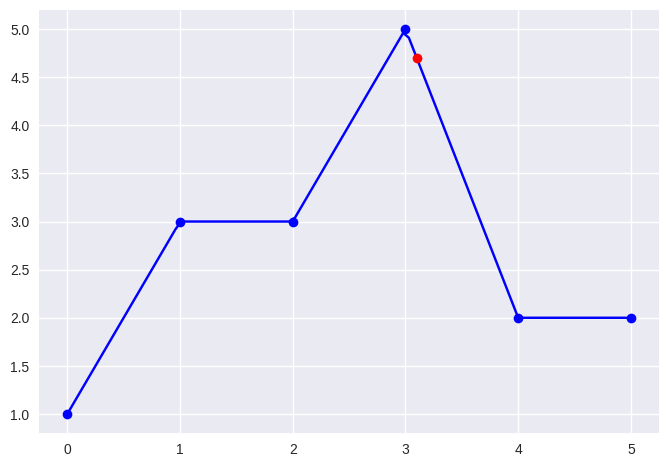

In [82]:
plt.plot(x,y,'ob')
plt.plot(x_lin,y_lin,'b')
plt.plot(3.1,f(3.1),'ro')
plt.show()


Newton Interpolation

In [83]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

%matplotlib inline
def divided_diff(x,y):
  '''
  function to calculate the devided different table
  '''
  n = len(y)
  coef = np.zeros([n,n])
  # a first coloum is y
  coef[:,0] = y

  for j in range (1,n):
    for i in range (n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1])/(x[i+j]-x[i])

  return coef


In [84]:
def newton_poly(coef,x_data,x):
  '''
  evaluate the newton polynomial
  at x
  '''
  n = len(x_data) - 1
  p = coef[n]
  for k in range (1,n+1):
    p = coef[n-k] + (x -x_data[n-k])*p
  return p

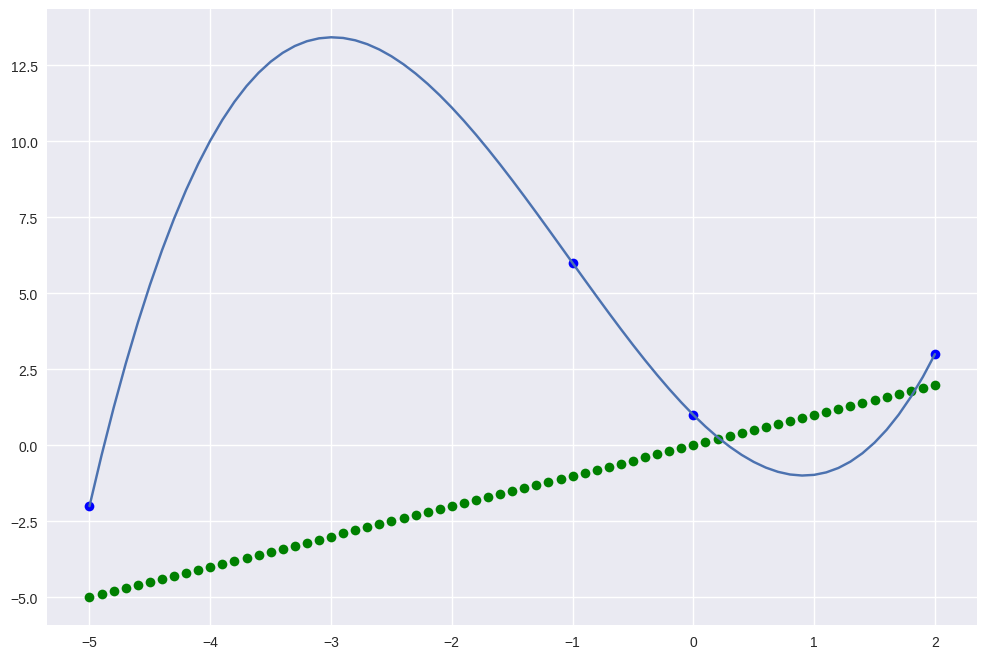

In [85]:
x = np.array([-5,-1,0,2])
y = np.array([-2,6,1,3])
# get the divided difference coef
a_s = divided_diff(x,y)[0,:]
# evaluate on new data points
x_new = np.arange(-5,2.1,.1)
y_new = newton_poly(a_s,x,x_new)
plt.figure(figsize = (12,8))
plt.plot(x,y,'bo')
plt.plot(x_new,x_new,'go')
plt.plot(x_new,y_new)


In [86]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

#generate x an y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

# assemble matrix A
A = np.vstack([x,np.ones(len(x))]).T

# turn y into a column vector
y = y[:,np.newaxis]

Cubic Spline Interpolation

In [87]:
x = [0,1,2,3,4,5]
y = [1,3,3,5,2,2]


In [88]:
f = CubicSpline(x,y,bc_type='natural')

x_cub = np.linspace(0,5,100)
y_cub = f(x_cub)

y_ask = f(2.9)
print(y_ask)

5.000368421052631


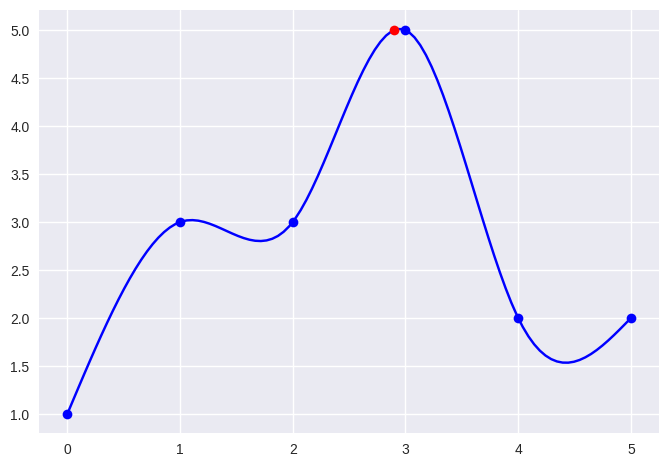

In [92]:
plt.plot(x,y,'bo')
plt.plot(x_cub,y_cub,'b')
plt.plot(2.9,f(2.9),'ro')
plt.show()
